# Graph Lab

## Header information:

  - Author #1: Buu Lam Ha (hab8@mcmaster.ca)
  - Author #2: Fondson Lu (luh57@mcmaster.ca)
  - Gitlab URL: https://gitlab.cas.mcmaster.ca/hab8/l1-graph-lab
  - Avenue to Learn group name: Group 62

To run tests, run 

`pipenv run python -m coverage run -m pytest -v lib/test/test_*.py`


### Week 1
#### Code

In [11]:
# imports
import sys
import matplotlib.pyplot as plt
import time
sys.path.insert(0, "./lib")
sys.path.insert(0, "./lib/graph")
sys.path.insert(0, "./lib/metrics")

from graph_builder_implementation import GraphBuilderImplementation
from line_builder import LineBuilder
from itinerary import Itinerary
from metrics.metric_extractor_graph import MetricExtractorGraph
from benchmark import *

# Generating a graph
builder = GraphBuilderImplementation()
map_ = builder.graph
map_.createIslands()
map_.connectIslands()

# Testing Itinerary (Dikjstra)
print("Dijkstra's")
start_station = map_.stations[11]
end_station = map_.stations[227]
method = "dijkstra"
itinerary = Itinerary(map_, start_station, end_station, method)
itinerary.travel(itinerary.method)
itinerary.display()

# Testing Itinerary (A Star)
print("\nA Star")
method = "a_star"
itinerary = Itinerary(map_, start_station, end_station, method)
itinerary.travel(method)
itinerary.display()

Dijkstra's
Station: Baker Street (id: 11) Zone: 1 Connections: [163 212 83 104 83 104 28 249 94 104]
Station: Edgware Road (C) (id: 83) Zone: 1 Connections: [11 193 193 11 193]
Station: Paddington (id: 193) Zone: 1 Connections: [82 278 18 83 18 83 83 218]
Station: Royal Oak (id: 218) Zone: 2 Connections: [193 283]
Station: Westbourne Park (id: 283) Zone: 2 Connections: [147 218]
Station: Ladbroke Grove (id: 147) Zone: 2 Connections: [150 283]
Station: Latimer Road (id: 150) Zone: 2 Connections: [147 227]
Station: Shepherd's Bush (H) (id: 227) Zone: 2 Connections: [101 150]
Total time: 14

A Star
Station: Baker Street (id: 11) Zone: 1 Connections: [163 212 83 104 83 104 28 249 94 104]
Station: Edgware Road (C) (id: 83) Zone: 1 Connections: [11 193 193 11 193]
Station: Paddington (id: 193) Zone: 1 Connections: [82 278 18 83 18 83 83 218]
Station: Royal Oak (id: 218) Zone: 2 Connections: [193 283]
Station: Westbourne Park (id: 283) Zone: 2 Connections: [147 218]
Station: Ladbroke Grove (i

#### Class diagram
![week1](img/week1.png)
#### Benchmark

In [2]:
# Running benchmark
%run -i "lib/graph/benchmark.py" --quiet

dijkstra: Mean +- std dev: 698 us +- 181 us
a_star: Mean +- std dev: 1.35 ms +- 0.15 ms


As you can see from the results of the benchmark, the Dijkstra algorithm had a Mean +/-
standard deviation of 442 us +/- 94 us. Whereas, the A* algorithm had a Mean +/- standard deviation
of 924 us +/- 137 us. By comparing the two, we can tell that the A* algorithm had a larger room of
estimation with an uncertainty 94 us and Dijkstra’s had an uncertainty of 137 us. The dijkstras algorithm
ran about 2.5 times faster than the A* algorithm and the A* algorithm had approximately 2 times
greater in uncertainty. 

The reason why Dijkstra's algorithm is faster is due to the method of implementation. Dijkstra's is a special case of A*, it does not rely on the estimated distance each station is to the end, and thus takes 1 less calculation (4 less data accesses) to execute.

*Note that due to how the dbenchmark was implemented, the results will differ each time!*

#### Work Split
As for week 1 of this lab, we have done an equal amount of work between both partners.
Regarding the “Loading and analyzing the graph” section of this lab, we have worked together to come
up with a design to ensure that the requirements of this lab were met. Throughout this week, we have
discussed any problems that occurred and further solved it either together or individually. We both
discussed the design and how to implement the classes, but Quinn has done most of the coding
regarding the classes and Fondson would share any work to Quinn so that all the progress and work
would be saved onto one system. All the work that we’ve worked on was pushed into the repository
from one of the systems. Quinn also worked on restructuring the related graph classes in the repository
to act closer to a library. As for the “shortest paths” section, Fondson has implemented the Dijkstra’s
Algorithm and Quinn has implemented the A* Algorithm so that we both do a fair amount of work.
Quinn is writing the benchmark, and Fondson is doing the report update.

#### Metrics

num_stations - 304
num_connections - 406.0
average_degree - 2.6710526315789473
degree_distribution - n/a


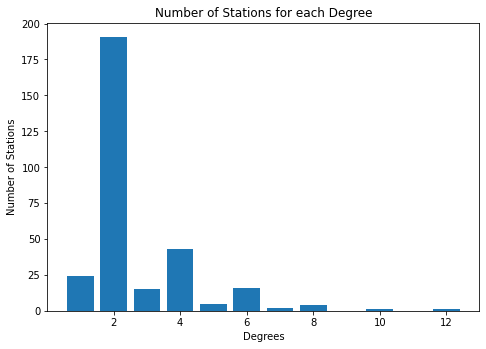

In [3]:
# Testing MetricExtractor
extractor = MetricExtractorGraph(map_)
extractor.set_metrics()
extractor.display()

# Plotting degree distribution
degree_distribution = extractor.metrics["degree_distribution"].dic

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
degree = degree_distribution.keys()
nodeNum = degree_distribution.values()
ax.set_title('Number of Stations for each Degree')
ax.bar(degree,nodeNum)
plt.xlabel("Degrees")
plt.ylabel("Number of Stations")
plt.show()

### Week 2
#### Diagram
![week1](img/week1.png)

##### Explanation
Within object-oriented programming, there are 5 main principles named SOLID. Our goal while
modifying the design was to meet the SOLID principles to ensure that the best practices are met when it
comes to class structures.

The SOLID principles stand for:
- Single responsibility principle
- Open-closed principle
- Liskov substitution principle
- Interface segregation principle
- Dependency Inversion principle

As you can see in the class diagram above, we have created new class files such as zone.py and island.py. Our newly created files support the single responsibility principle as each class specifically carries one responsibility. Our zone.py carries the responsibility of storing a subset of stations in a graph and island.py carries the responsibility of storing a subset of stations in a zone. Our metric_extractor.py file has an abstract class that carries the abstract methods.

In addition, we have created the file metric_extractor.py to hold abstract classes that our metric_extractor_graph.py can further implement. By following the Factory design pattern, our metrics are open-closed (we can add new metrics without changing other code), and we adhere by the dependency inversion princple (by loosely coupling related classes together through abstraction).

As for the interface segregation principle, it implies the idea that a client should not be exposed to
methods it does not need. Therefore, with the ccreation of several classes, it has it’s own availability of
implementing its own methods and carrying a responsibility that the class wants to proceed with. The
open-close principle states that an entity must be open for extension but closed for modification. This
practice in object-oriented programming can further reduce future errors as modifications can lead to
problems in other categories. Whereas the possibility of extension is a good asset to have in case there
are future situations where you may want to create new functionalities in order to advance in the
project at hand.
#### Code

In [13]:
stations = [map_.stations[11], map_.stations[83], map_.stations[193], map_.stations[218], map_.stations[283]]
start_station = map_.stations[11]

# Testing subwayPatrol
print("Subway Patrol Path")
path, weight = map_.subwayPatrol(stations,start_station)

for station in path:
    station.display()
print("Weight: ", weight)

Subway Patrol Path
0.03114938735961914
Station: Baker Street (id: 11) Zone: 1 Connections: [163 212 83 104 83 104 28 249 94 104]
Station: Edgware Road (C) (id: 83) Zone: 1 Connections: [11 193 193 11 193]
Station: Paddington (id: 193) Zone: 1 Connections: [82 278 18 83 18 83 83 218]
Station: Royal Oak (id: 218) Zone: 2 Connections: [193 283]
Station: Westbourne Park (id: 283) Zone: 2 Connections: [147 218]
Station: Royal Oak (id: 218) Zone: 2 Connections: [193 283]
Station: Paddington (id: 193) Zone: 1 Connections: [82 278 18 83 18 83 83 218]
Station: Edgware Road (C) (id: 83) Zone: 1 Connections: [11 193 193 11 193]
Station: Baker Street (id: 11) Zone: 1 Connections: [163 212 83 104 83 104 28 249 94 104]
Weight:  18


In [12]:
# Example of islands in a particular zone (connected components)
map_.createIslands()
map_.connectIslands()
print("Zone:", map_.zones[6].id)
for islands in map_.zones[6].islands:
    print("Island", islands.id, "stations")
    for station in islands.stations:
        print(station.name)


Zone: 6
Island 6.0 stations
Elm Park
Hornchurch
Upminster Bridge
Upminster
Island 6.01 stations
Heathrow Terminal 4
Island 6.02 stations
Hillingdon
Ickenham
Ruislip
Ruislip Manor
Uxbridge
Island 6.03 stations
Northwood
Northwood Hills
Island 6.04 stations
West Ruislip
Island 6.05 stations
Epping
Theydon Bois
Debden
Loughton


In [8]:
# Displaying Zone Connections
map_.displayZoneConnections()

Zone: 1 connects to zone: 2
Zone: 1.5 connects to zone: 1, 2
Zone: 10 connects to zone: 9
Zone: 2 connects to zone: 1.5, 2.5, 1, 3
Zone: 2.5 connects to zone: 3, 2
Zone: 3 connects to zone: 2.5, 3.5, 4
Zone: 3.5 connects to zone: 4, 3
Zone: 4 connects to zone: 3, 3.5, 5
Zone: 5 connects to zone: 4, 6, 5.5
Zone: 5.5 connects to zone: 6
Zone: 6 connects to zone: 5, 5.5, 6.5
Zone: 6.5 connects to zone: 7
Zone: 7 connects to zone: 8, 6.5
Zone: 8 connects to zone: 9, 7
Zone: 9 connects to zone: 10


#### Performance Analysis

##### Shortest Path
From a theoretical standpoint when comparing the two shortest path algorithms implemented in week 1, it is commonly the case where A* is a lot faster than Dijkstra’s. The explanation of our code implementation of our heuristics and algorithms were given under the benchmarking portion above (Week1-PartC). When it comes to the empirical point of view of this lab, the implementations of our algorithms shows that Dijkstra’s gives a better performance than A. We have run several tests/benchmarking of the algorithm and every test returns an approximate speed difference by approximately 2.5 times. This means that the Dijkstra’s Algorithm is running 2.5 times faster than the A algorithm and with a smaller uncertainty by approximately 2 times.

##### Subway Patrol Planning
As for the Subway Patrol Planning algorithm, it is very similar to the travelling salesman shortest path algorithm, and it essentially visits all stations and returns to the start station. Our implementation was to visit all necessary stations and then apply Dijkstra’s to go back. The time complexity for this algorithm would be O(s + i<sup>2</sup>pja) where s = stations, i and j = index variables, p = permutations, and a = running time for A. When it comes to the empirical perspective and verifying by observation, the Subway Patrol planning will take approximately 0.03114938735961914 seconds for only 5 stations. The greatest reason as to why the Subway Patrol planning has a very large run time is due to the exponential time complexity of generating permutations.



##### Urbanism Planning
From a theoretical perspective, the Urbanism Planning algorithm has a run time of O(kz<sup>2</sup>s + kz<sup>2</sup>s<sup>2</sup>*c) where k = key, z = zone, s = station, and c = connection. The run time of this algorithm should be fairly slow because it has two for loops within a for loop, and within one of those for loops, there is a recursive call of the DFS implementation which also carries a run time of connections for every station. When it comes to the empirical perspective and verifying by observation, the urbanism planning takes approximately 0.003573894500732422 seconds for a set of 304 stations


### Quinn Self Reflection

#### Backward
I have not done similar work in the past, I only have experience designing small-scale systems that do not require the use of design patterns to enforce SOLID principles.

#### Inward
So far in my sofware engineering degree, we simply learned about concepts - I felt that this project gave us an opportunity to hone our "engineering" skills, by building a system from the ground up. I enjoyed the freedom given to the students to explore different methods of implementation, with little guidance, as I feel as that correctly reflects engineering work tasked in the workforce. Furthermore, the scale of work was enjoyable, as there was many complex intersections between components of the system design which was fun to work through.

I disliked the amount of implementation needed for this work given the time allocated. I felt as week 1 could have been the entire project due to how much was expected in the single week - we were thrown in the deep end with this new way of thinking and creating: after all, our entire education is built on following instructions. In addition, it also felt as the TA's were understandably lost in sections of the project while attempting to help us, I wish we had a portion in the instructions which summarized expectations for each part of the project. One part of engineering is being able to communicate with stakeholders, and if the stakeholders (TAs) aren't aligned across section, it becomes difficult to navigate how we can best deliver.

#### Outward
One thing I'm proud of is how I modified my connection object to fit connections between stations and connections between zones! In addition, being able to use the metric extractor to drill in and get more granular information on a graph or zone level while reusing code was a neat trick that was implemented. 

#### Forward
If i had the chance to redo this project, I would implement more design patterns to enforce SOLID principles. For example, I would use a strategy deisgn pattern for our shortest path algorithm should a new one be more appropriate for our situation - with a strategy deisng pattern, it would be open to extension but closed for modification. In addition, I would love to dive deeper into our heuristics in how we determine the shortest path, taking in external factors into account such as number of lines, stations, potential expected closures, etc. 

In addition, our method of implementing a list of stations would be revamped, as some stations this time around were missing, and were manually added. Indexing plays a large part of various algorithms in the project, so adapting our code structure to allow for more flexibility would be performed next time!

#### General Thoughts
This project was super fun. I really loved the freedom we had to design a solution from scratch - I actually feel like I'm in an engineering program instead of a diluted CS degree. The deliverables first two weeks hit the sweet spot of difficulty when it came to the main implementation, with an increased difficulty with testing, benchmarking, etc. 

The biggest complaint I would have is the lack of time - week 1 and the pre-lab could have been the entire lab, especially as some groups weren't resolved until the second week. The timeline felt rushed, with no feedback on weekly activity that would have helped our group iterate over our implementation.

In addition, I wish there was more clarity over how to implement testing and benchmarking outside of a couple of lecture slides: I would've been better equipped with some real-time in-class examples of how to implement these aspects, as well as in depth explanation on how each feature works (maybe more lectures are required haha). 

### Fondson Self Reflection

#### Backward
From my own experience, I have not done any similar work to this in the past. This was my first time implementing slightly more complex algorithms that I’ve learned from past courses and applying it to a specific problem.

#### Inward
From this lab, I feel like there is a lot of work required to do within a set amount of time which is one of my biggest dislikes regarding this first lab. Otherwise, I really enjoyed applying information that I’ve learned from the past and getting the experience to parse given information and manipulating it to our desires. Being able to produce correct code and solving the problems at hand is one of the best feelings there is to coding problems. 

#### Outward 
Throughout the past 3 weeks, the biggest thing I want people to notice about our work is the amount of effort we have put in towards the completion of this lab. We have covered every detail and more regarding the outline of this lab. We have asked several questions when we were ever confused, and we put in our best efforts to create all the required classes, separate them into a sort of library, and overall, be very organized with all our hard work. 

#### Forward
Assuming that anything can be changed, I would increase the amount of time we were given to complete this lab. With more time available, it gives us access to more creativity and design regarding the aspects of this project. It would also give us more time to better implement the algorithms, if possible, to perform a better run time and time complexity of each algorithm.